# Importing Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Loading Divvybikes dataset for 2017 Q1Q2

In [2]:
divvy_q1 = pd.read_csv("Divvy_Trips_2017_Q1.csv")
divvy_q2 = pd.read_csv("Divvy_Trips_2017_Q2.csv")
divvy_stations = pd.read_csv("Divvy_Stations_2017_Q1Q2.csv")

# Descriptive Statistics

In [3]:
# Descriptive Statistics for Trip Duration
trip_duration_stats_q1 = divvy_q1['tripduration'].describe()
trip_duration_stats_q2 = divvy_q2['tripduration'].describe()

In [4]:
# Display Descriptive Statistics
print("Trip Duration Descriptive Statistics - Q1:")
print(trip_duration_stats_q1)

print("\nTrip Duration Descriptive Statistics - Q2:")
print(trip_duration_stats_q2)

Trip Duration Descriptive Statistics - Q1:
count    431691.000000
mean        742.639888
std        1514.943868
min          60.000000
25%         328.000000
50%         535.000000
75%         886.000000
max       86338.000000
Name: tripduration, dtype: float64

Trip Duration Descriptive Statistics - Q2:
count    1.119814e+06
mean     1.015775e+03
std      1.649333e+03
min      6.000000e+01
25%      4.280000e+02
50%      7.340000e+02
75%      1.215000e+03
max      8.622400e+04
Name: tripduration, dtype: float64


In [5]:
# Descriptive Statistics for Station Capacity
station_capacity_stats = divvy_stations['dpcapacity'].describe()

In [6]:
# Display Descriptive Statistics
print("Station Capacity Descriptive Statistics:")
print(station_capacity_stats)

Station Capacity Descriptive Statistics:
count    582.000000
mean      17.176976
std        6.103633
min        0.000000
25%       15.000000
50%       15.000000
75%       19.000000
max       51.000000
Name: dpcapacity, dtype: float64


# Data Cleaning and Preprocessing

In [7]:
# Step 1: Check for Null Values
print("Null Values in Q1:")
print(divvy_q1.isnull().sum())

print("\nNull Values in Q2:")
print(divvy_q2.isnull().sum())

Null Values in Q1:
trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               41379
birthyear            41297
dtype: int64

Null Values in Q2:
trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               275488
birthyear            275386
dtype: int64


In [8]:
# Step 2: Check Variable Types
print("\nVariable Types in Q1:")
print(divvy_q1.dtypes)

print("\nVariable Types in Q2:")
print(divvy_q2.dtypes)


Variable Types in Q1:
trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

Variable Types in Q2:
trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object


In [9]:
# Step 3: Remove Rows with Missing Start or End Dates
divvy_q1 = divvy_q1.dropna(subset=['start_time', 'end_time'])
divvy_q2 = divvy_q2.dropna(subset=['start_time', 'end_time'])

In [10]:
# Step 4: Remove Trips Less Than 1 Minute and Greater Than 24 Hours
divvy_q1 = divvy_q1[(divvy_q1['tripduration'] >= 60) & (divvy_q1['tripduration'] <= 86400)]
divvy_q2 = divvy_q2[(divvy_q2['tripduration'] >= 60) & (divvy_q2['tripduration'] <= 86400)]

In [11]:
# Step 5: Remove Duplicate Rows (if any)
divvy_q1 = divvy_q1.drop_duplicates()
divvy_q2 = divvy_q2.drop_duplicates()

In [12]:
# Step 6: Handle Gender and Birthyear Null Values for Subscribers
subscribers_q1 = divvy_q1[divvy_q1['usertype'] == 'Subscriber']
subscribers_q2 = divvy_q2[divvy_q2['usertype'] == 'Subscriber']

In [13]:
# Remove Rows with Null Gender and Birthyear for Subscribers
subscribers_q1 = subscribers_q1.dropna(subset=['gender', 'birthyear'])
subscribers_q2 = subscribers_q2.dropna(subset=['gender', 'birthyear'])

In [14]:
# Display the shape after cleaning
print("\nShape of Q1 after Cleaning:", divvy_q1.shape)
print("Shape of Q2 after Cleaning:", divvy_q2.shape)


Shape of Q1 after Cleaning: (431691, 12)
Shape of Q2 after Cleaning: (1119803, 12)


# Data Analysis

In [15]:
import seaborn as sns

In [16]:
user_type_counts_q1 = divvy_q1['usertype'].value_counts()
user_type_counts_q2 = divvy_q2['usertype'].value_counts()

In [17]:
print(user_type_counts_q1.head())

Subscriber    390292
Customer       41395
Dependent          4
Name: usertype, dtype: int64


In [18]:
print(user_type_counts_q2.head())

Subscriber    844047
Customer      275756
Name: usertype, dtype: int64


# Calculation of revenue from each user type in Q1 and Q2

In [19]:
# Define prices for each user type
price_per_year = 108
price_per_trip = 3.3
price_per_day = 15

In [20]:
# Calculate revenue for each user type in Q1
revenue_q1 = divvy_q1.groupby('usertype')['tripduration'].sum() * divvy_q1.groupby('usertype')['usertype'].apply(lambda x: price_per_year if 'Subscriber' in x.values else price_per_day)

In [21]:
# Calculate revenue for each user type in Q2
revenue_q2 = divvy_q2.groupby('usertype')['tripduration'].sum() * divvy_q2.groupby('usertype')['usertype'].apply(lambda x: price_per_year if 'Subscriber' in x.values else price_per_day)

In [22]:
# Visualize the revenue for each user type in a clustered column chart
combined_revenue = pd.concat([revenue_q1, revenue_q2], axis=1, keys=['Q1', 'Q2'])

In [23]:
import numpy as np

In [24]:
# Set the positions and width for the bars
barWidth = 0.35
r1 = np.arange(len(revenue_q1))
r2 = [x + barWidth for x in r1]

posx and posy should be finite values
posx and posy should be finite values


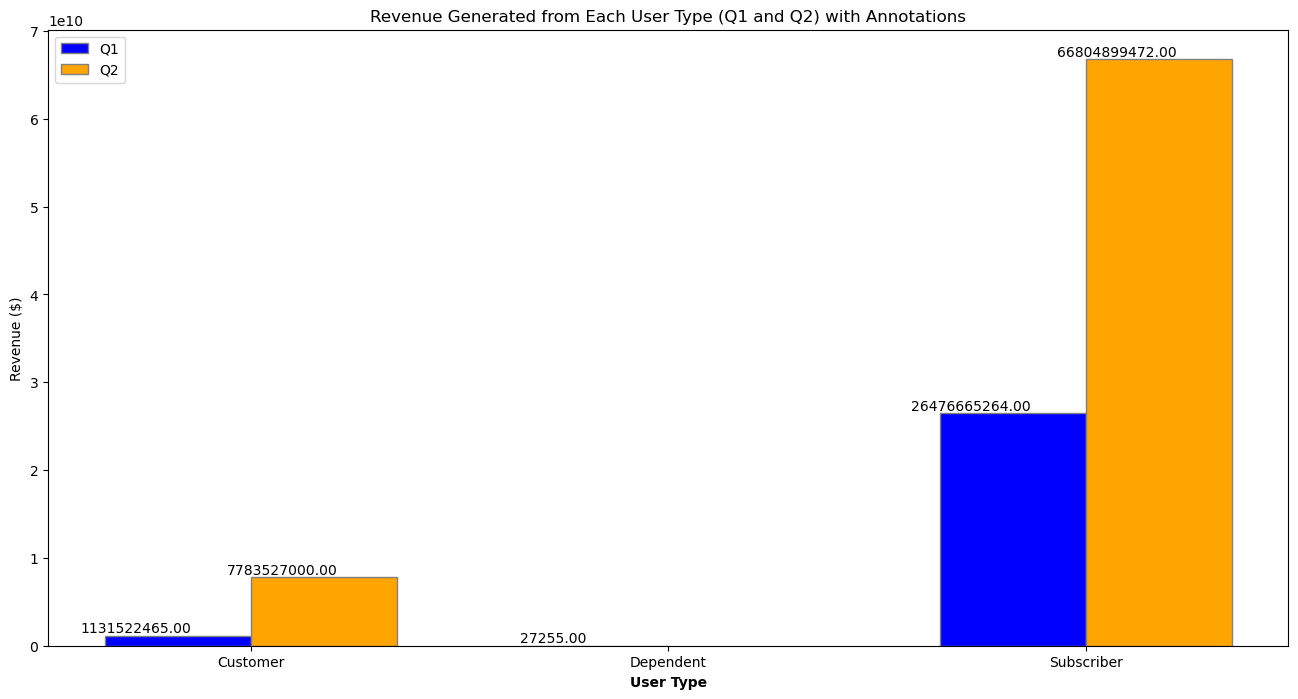

In [25]:
# Increase figure width
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the clustered column chart with annotations
bars_q1 = ax.bar(r1, combined_revenue['Q1'], color='blue', width=barWidth, edgecolor='grey', label='Q1')
bars_q2 = ax.bar(r2, combined_revenue['Q2'], color='orange', width=barWidth, edgecolor='grey', label='Q2')

# Add value annotations for each bar
for bar, value in zip(bars_q1, combined_revenue['Q1']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 10, f'{value:.2f}', ha='center', va='bottom')

for bar, value in zip(bars_q2, combined_revenue['Q2']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 10, f'{value:.2f}', ha='center', va='bottom')

# Customize the chart
plt.xlabel('User Type', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(revenue_q1))], revenue_q1.index)
plt.title('Revenue Generated from Each User Type (Q1 and Q2) with Annotations')
plt.ylabel('Revenue ($)')
plt.legend()

# Show the chart
plt.show()

# Merging of Station data

In [26]:
divvy_q1 = pd.merge(divvy_q1, divvy_stations, left_on='from_station_id', right_on='id', how='left')
divvy_q2 = pd.merge(divvy_q2, divvy_stations, left_on='from_station_id', right_on='id', how='left')

In [27]:
# Merge the two datasets based on common columns
merged_divvy = pd.concat([divvy_q1, divvy_q2])

In [28]:
merged_divvy.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,id,name,city,latitude,longitude,dpcapacity,online_date
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,66,Clinton St & Lake St,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,199,Wabash Ave & Grand Ave,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,520,Greenview Ave & Jarvis Ave,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,110,Dearborn St & Erie St,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,327,Sheffield Ave & Webster Ave,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38


In [29]:
# trip id, start time, end time, bike id, from station_id, from station_nme, from station name, to sttaion name, birthyear, id, city, name, online date

In [30]:
columns_to_drop = ['start_time', 'end_time', 'bikeid', 'name', 'id', 'city','from_station_name', 'to_station_id','from_station_id', 'birthyear','trip_id','to_station_name', 'online_date', 'city']
merged_divvy = merged_divvy.drop(columns=columns_to_drop)

In [31]:
merged_divvy.head()

,tripduration,usertype,gender,latitude,longitude,dpcapacity
0,857,Subscriber,Male,41.885637,-87.641823,23
1,236,Subscriber,Male,41.890912,-87.626804,15
2,348,Subscriber,Female,42.015962,-87.668570,23
3,288,Subscriber,Male,41.893992,-87.629318,23
4,415,Subscriber,Female,41.921540,-87.653818,19


In [32]:
print("\nVariable Types in the merged dataset:")
print(merged_divvy.dtypes)


Variable Types in the merged dataset:
tripduration      int64
usertype         object
gender           object
latitude        float64
longitude       float64
dpcapacity        int64
dtype: object


In [33]:
merged_divvy = merged_divvy.drop_duplicates()

# Data Visualisation

<Figure size 1000x600 with 0 Axes>

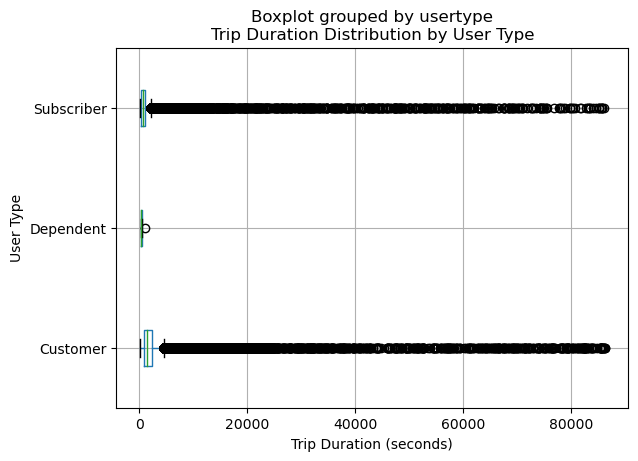

In [34]:
# Trip Time Duration
plt.figure(figsize=(10, 6))
merged_divvy.boxplot(column='tripduration', by='usertype', vert=False)
plt.title('Trip Duration Distribution by User Type')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('User Type')
plt.show()

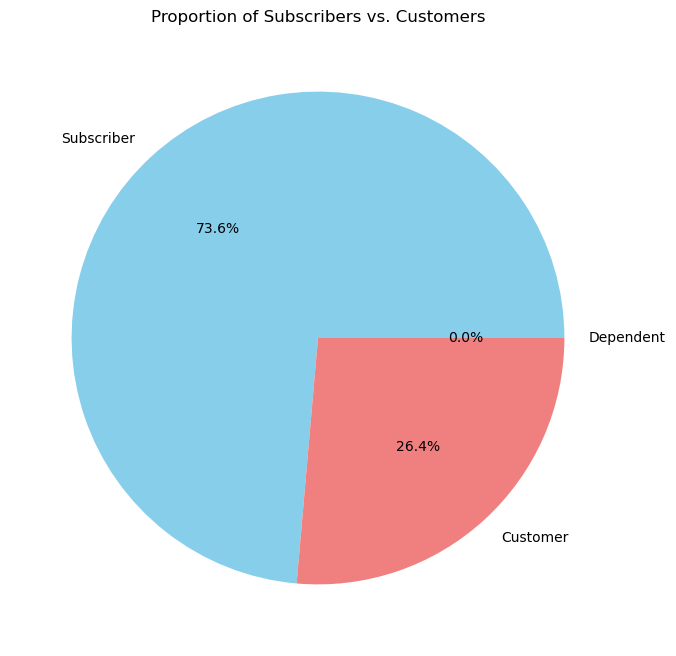

In [35]:
# Proportion of Subscriber versus Customers
plt.figure(figsize=(8, 8))
merged_divvy['usertype'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Subscribers vs. Customers')
plt.ylabel('')
plt.show()

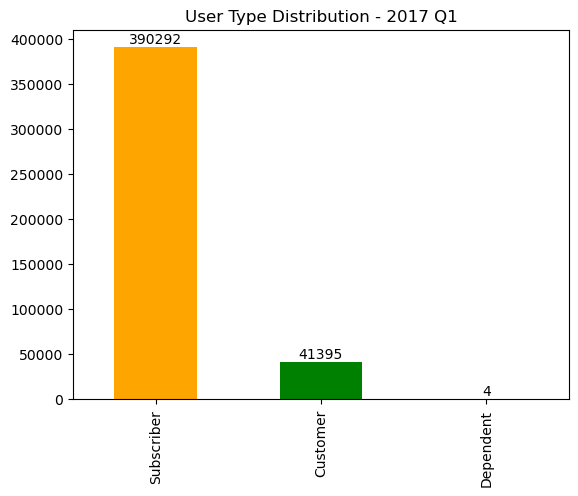

In [36]:
# User Type Distribution for Q1
plt.subplot(1, 1, 1)
divvy_q1['usertype'].value_counts().plot(kind='bar', color=['orange', 'green'])
plt.title('User Type Distribution - 2017 Q1')

for i, value in enumerate(divvy_q1['usertype'].value_counts()):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')

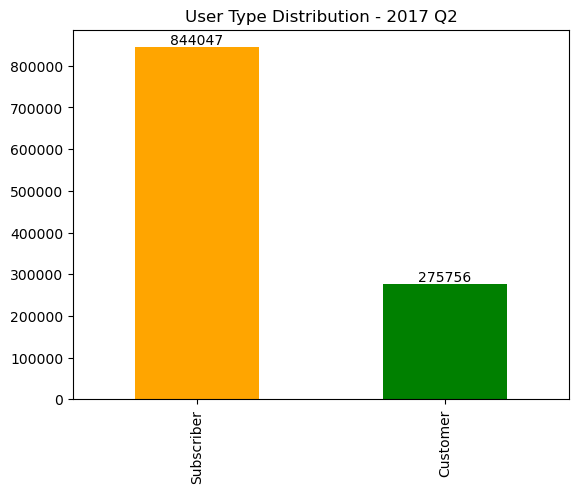

In [37]:
# User Type Distribution for Q2
plt.subplot(1, 1, 1)
divvy_q2['usertype'].value_counts().plot(kind='bar', color=['orange', 'green'])
plt.title('User Type Distribution - 2017 Q2')
for i, value in enumerate(divvy_q2['usertype'].value_counts()):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')

In [38]:
# Station Capacity Distribution:

Text(18.176975945017183, 20, 'Mean Capacity: 17.18')

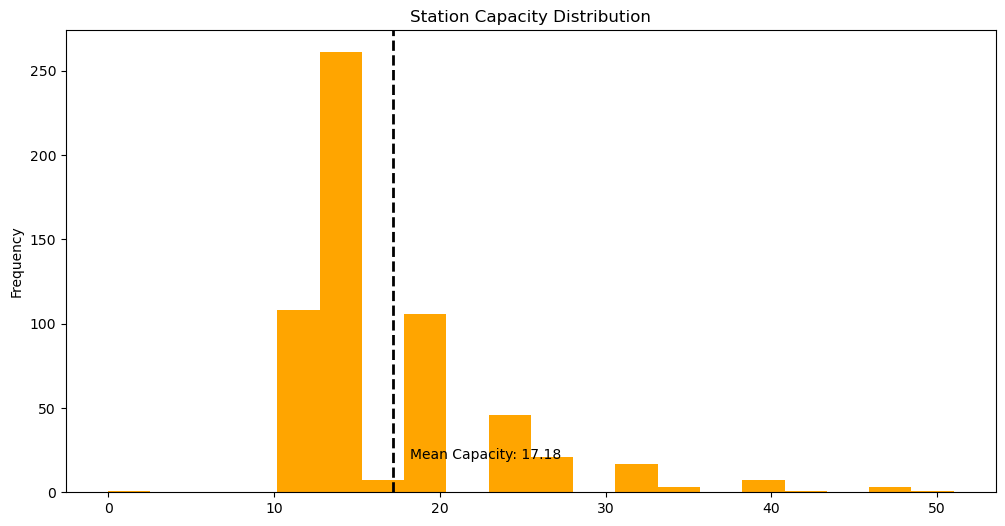

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
divvy_stations['dpcapacity'].plot(kind='hist', bins=20, color='orange')
plt.title('Station Capacity Distribution')

# Add mean value as annotation
mean_capacity = divvy_stations['dpcapacity'].mean()
plt.axvline(mean_capacity, color='black', linestyle='dashed', linewidth=2)
plt.text(mean_capacity + 1, 20, f'Mean Capacity: {mean_capacity:.2f}', color='black')

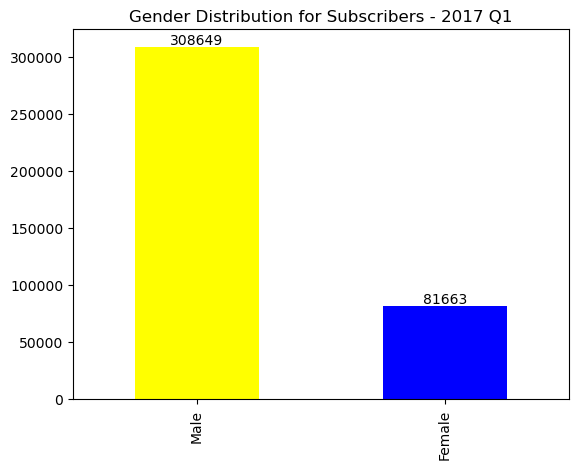

In [40]:
# Gender Distribution for Subscribers:
plt.subplot(1, 1, 1)
divvy_q1['gender'].value_counts().plot(kind='bar', color=['yellow', 'blue'])
plt.title('Gender Distribution for Subscribers - 2017 Q1')

# Add values as annotations
for i, value in enumerate(divvy_q1['gender'].value_counts()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

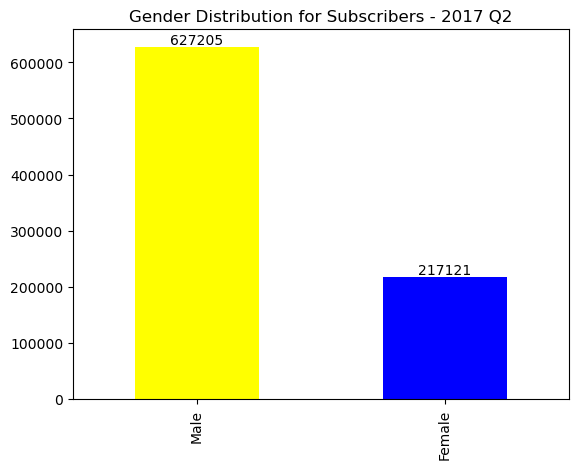

In [41]:
plt.subplot(1, 1, 1)
divvy_q2['gender'].value_counts().plot(kind='bar', color=['yellow', 'blue'])
plt.title('Gender Distribution for Subscribers - 2017 Q2')

# Add values as annotations
for i, value in enumerate(divvy_q2['gender'].value_counts()):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

Text(0.5, 1.0, 'Daily Trip Count Trend - 2017 Q1')

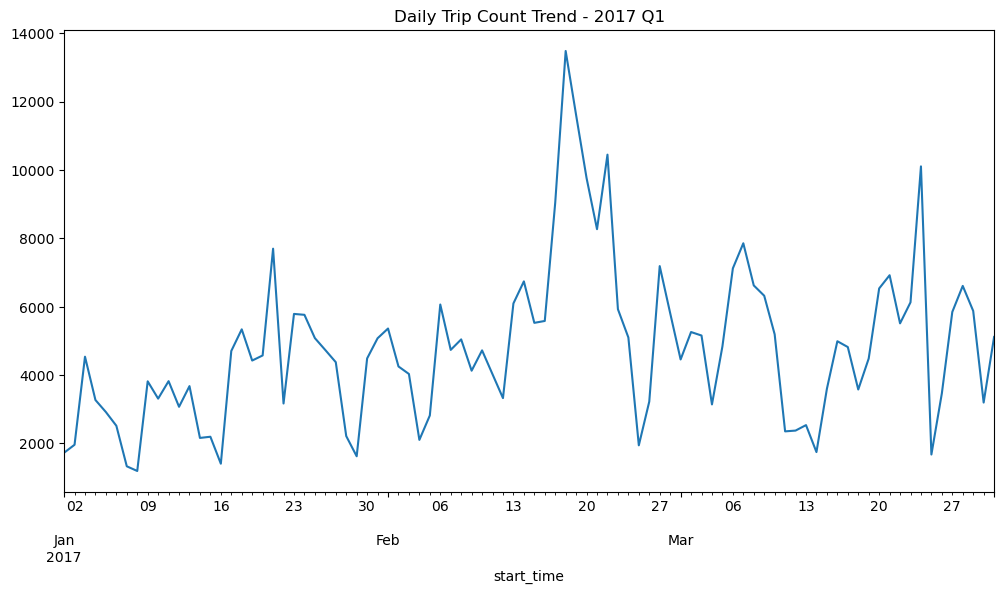

In [42]:
# Daily Trip Count Trend for Q1
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
divvy_q1['start_time'] = pd.to_datetime(divvy_q1['start_time'])
divvy_q1.resample('D', on='start_time').size().plot()
plt.title('Daily Trip Count Trend - 2017 Q1')

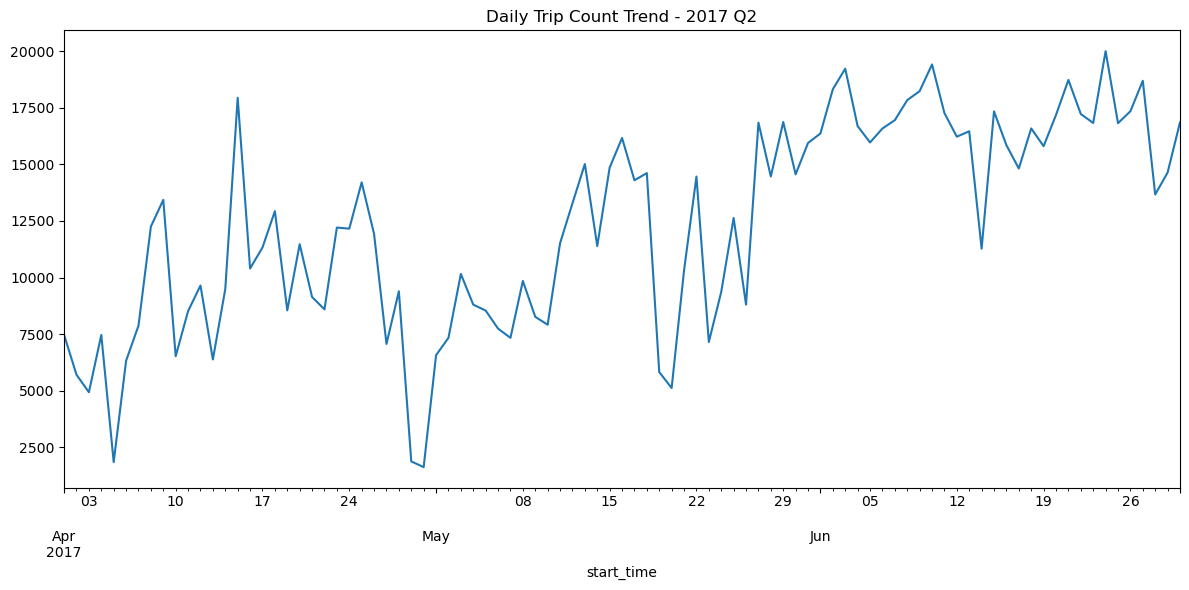

In [43]:
# Daily Trip Count Trend for Q2
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
divvy_q2['start_time'] = pd.to_datetime(divvy_q2['start_time'])
divvy_q2.resample('D', on='start_time').size().plot()
plt.title('Daily Trip Count Trend - 2017 Q2')

plt.tight_layout()
plt.show()